Deep Learning Assignment-2
Group members
1. Tsion Meride
2. Ruth Tamiru

**Image classification using CIFAR-10 dataset and CNN architecture**

    As the title indicates the problem we are trying to address is classifying images given the CIFAR-10 dataset.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

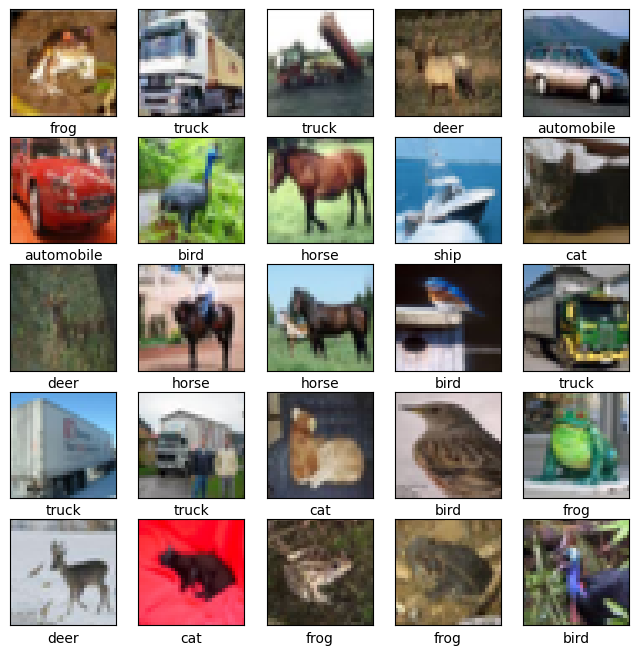

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Here we will start manipulating the optimizing algorithms and evaluation metrics.

part-1 algorithms

In [8]:


model.compile(optimizer='sgd',  #  stochastic gradient descent
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model with batch size set to the entire training data
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 5ms/step - loss: 2.0469 - accuracy: 0.2446 - val_loss: 1.8429 - val_accuracy: 0.3534
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6693 - accuracy: 0.3963 - val_loss: 1.5625 - val_accuracy: 0.4366
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4643 - accuracy: 0.4709 - val_loss: 1.3952 - val_accuracy: 0.4970
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3524 - accuracy: 0.5159 - val_loss: 1.3711 - val_accuracy: 0.5076
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2690 - accuracy: 0.5477 - val_loss: 1.2374 - val_accuracy: 0.5550
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1962 - accuracy: 0.5775 - val_loss: 1.1917 - val_accuracy: 0.5782
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1316 - accuracy: 0.6027 - val_loss: 1.2649 - val_accuracy

313/313 - 1s - loss: 1.0733 - accuracy: 0.6257 - 832ms/epoch - 3ms/step


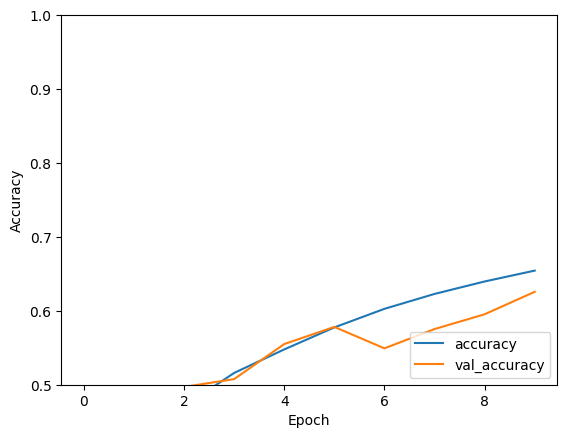

In [9]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [10]:
print('Test Accuracy for stochastic gradient is',test_acc)

Test Accuracy for stochastic gradient is 0.6256999969482422


In [11]:
batch_size = 32
model.compile(optimizer='sgd',  # Base optimizer for mini-batch SGD
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model with the chosen batch size
history = model.fit(train_images, train_labels, epochs=10, batch_size=batch_size,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9421 - accuracy: 0.6704 - val_loss: 1.0258 - val_accuracy: 0.6399
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9056 - accuracy: 0.6822 - val_loss: 0.9702 - val_accuracy: 0.6624
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8704 - accuracy: 0.6978 - val_loss: 0.9673 - val_accuracy: 0.6690
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8402 - accuracy: 0.7066 - val_loss: 0.9551 - val_accuracy: 0.6743
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8072 - accuracy: 0.7197 - val_loss: 0.9626 - val_accuracy: 0.6709
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7824 - accuracy: 0.7259 - val_loss: 0.9698 - val_accuracy: 0.6656
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7524 - accuracy: 0.7375 - val_loss: 0.9303 - val_accurac

313/313 - 1s - loss: 0.9111 - accuracy: 0.6918 - 646ms/epoch - 2ms/step


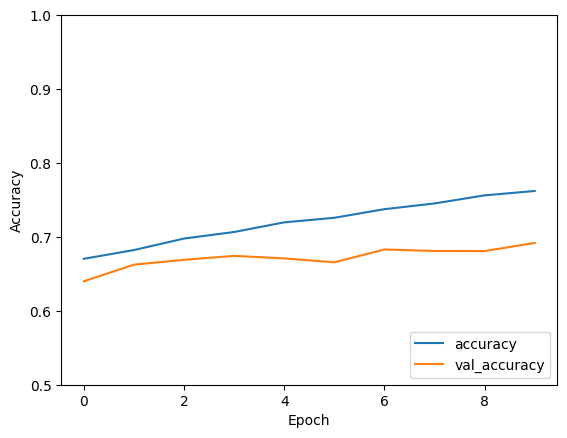

In [12]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [13]:
print('Test Accuracy for mini batch gradient descent is',test_acc)

Test Accuracy for mini batch gradient descent is 0.6917999982833862


In [29]:
# batch gradient will come out with an error as it is memory intensive


part-2 algorithms


In [31]:
model.compile(optimizer='sgd',  # Base optimizer for momentum
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10


1563/1563 [==============================] - 9s 5ms/step - loss: 0.0490 - accuracy: 0.9842 - val_loss: 2.3499 - val_accuracy: 0.6932
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0182 - accuracy: 0.9957 - val_loss: 2.4420 - val_accuracy: 0.7011
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0110 - accuracy: 0.9984 - val_loss: 2.5410 - val_accuracy: 0.7020
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0078 - accuracy: 0.9993 - val_loss: 2.6092 - val_accuracy: 0.7013
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0060 - accuracy: 0.9997 - val_loss: 2.6518 - val_accuracy: 0.7044
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0050 - accuracy: 0.9998 - val_loss: 2.7049 - val_accuracy: 0.7023
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0043 - accuracy: 0.9999 - val_loss: 2.7406 - val_accuracy: 0.7032
Epo

313/313 - 1s - loss: 2.8478 - accuracy: 0.7039 - 659ms/epoch - 2ms/step


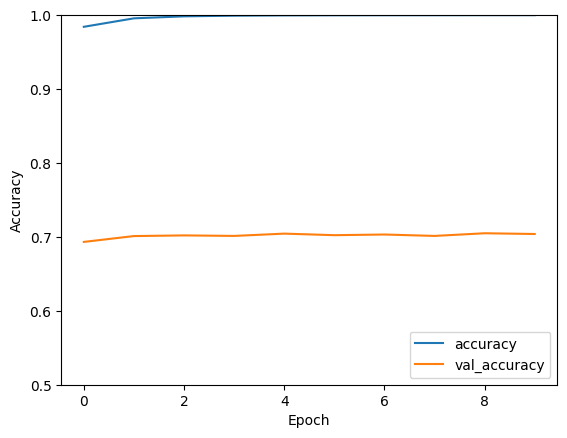

In [32]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [33]:
print('Test Accuracy for gradient descent is',test_acc)

Test Accuracy for gradient descent is 0.7038999795913696


In [8]:
model.compile(optimizer='sgd',  # Base optimizer for momentum
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Create a separate momentum object with desired decay rate
momentum = tf.keras.optimizers.SGD(momentum=0.9)  # Common momentum value

# Wrap the SGD optimizer with the momentum object
model.compile(optimizer=momentum,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 1.6527 - accuracy: 0.3943 - val_loss: 1.4256 - val_accuracy: 0.4782
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2318 - accuracy: 0.5626 - val_loss: 1.2189 - val_accuracy: 0.5590
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0490 - accuracy: 0.6305 - val_loss: 1.0105 - val_accuracy: 0.6467
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9441 - accuracy: 0.6691 - val_loss: 1.1171 - val_accuracy: 0.6126
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8595 - accuracy: 0.6984 - val_loss: 0.9418 - val_accuracy: 0.6738
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7880 - accuracy: 0.7223 - val_loss: 0.9640 - val_accuracy: 0.6791
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7341 - accuracy: 0.7421 - val_loss: 0.9920 - val_accurac

313/313 - 1s - loss: 1.0738 - accuracy: 0.6726 - 654ms/epoch - 2ms/step


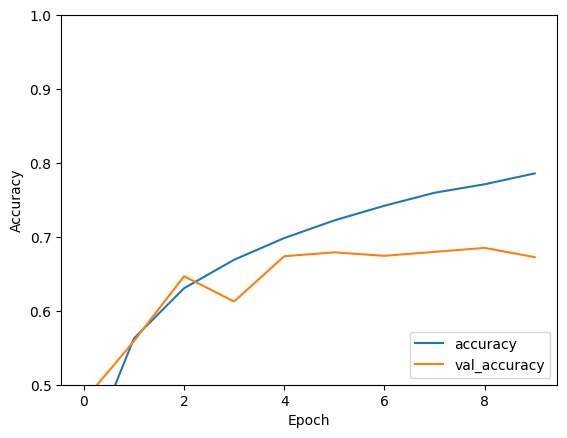

In [9]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [10]:
print('Test Accuracy for gradient descent with momentum is',test_acc)

Test Accuracy for graadient descent with momentum is 0.6725999712944031


In [30]:
#Nestrov momentum is also impractical and complex for larger datasets

part-3 algorithms

In [13]:
model.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3969 - accuracy: 0.8631 - val_loss: 0.9531 - val_accuracy: 0.7097
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3456 - accuracy: 0.8807 - val_loss: 0.9603 - val_accuracy: 0.7158
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3258 - accuracy: 0.8881 - val_loss: 0.9678 - val_accuracy: 0.7173
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3130 - accuracy: 0.8926 - val_loss: 0.9744 - val_accuracy: 0.7204
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3035 - accuracy: 0.8960 - val_loss: 0.9791 - val_accuracy: 0.7213
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2958 - accuracy: 0.8988 - val_loss: 0.9841 - val_accuracy: 0.7209
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2893 - accuracy: 0.9006 - val_loss: 0.9883 - val_accuracy

313/313 - 1s - loss: 0.9985 - accuracy: 0.7232 - 648ms/epoch - 2ms/step


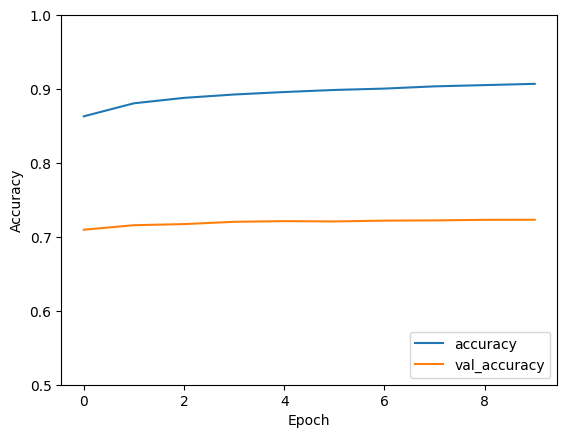

In [14]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [15]:
print('Test Accuracy for adagrad  is',test_acc)

Test Accuracy for adagrad  is 0.7232000231742859


In [16]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.4293 - accuracy: 0.8472 - val_loss: 1.0804 - val_accuracy: 0.7067
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3703 - accuracy: 0.8710 - val_loss: 1.2352 - val_accuracy: 0.6971
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3239 - accuracy: 0.8856 - val_loss: 1.3482 - val_accuracy: 0.6974
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2877 - accuracy: 0.8990 - val_loss: 1.3982 - val_accuracy: 0.7018
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2553 - accuracy: 0.9116 - val_loss: 1.5285 - val_accuracy: 0.6899
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2343 - accuracy: 0.9189 - val_loss: 1.6738 - val_accuracy: 0.6916
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2255 - accuracy: 0.9245 - val_loss: 1.8712 - val_accuracy:

313/313 - 1s - loss: 2.2178 - accuracy: 0.6797 - 673ms/epoch - 2ms/step


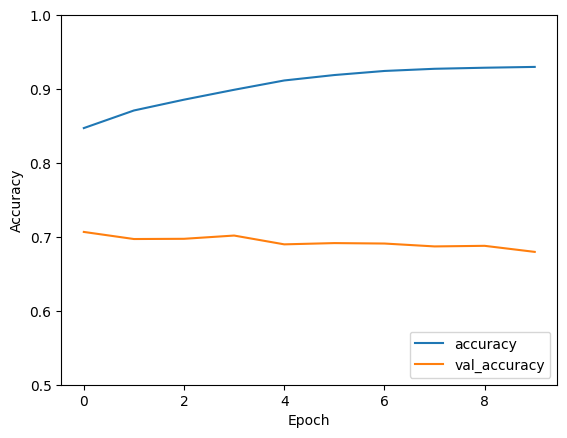

In [17]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [18]:
print('Test Accuracy for Rmsprop  is',test_acc)

Test Accuracy for Rmsprop  is 0.6797000169754028


In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 0.2539 - accuracy: 0.9183 - val_loss: 2.1012 - val_accuracy: 0.6882
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2023 - accuracy: 0.9319 - val_loss: 2.1622 - val_accuracy: 0.6691
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1901 - accuracy: 0.9351 - val_loss: 2.1186 - val_accuracy: 0.6816
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1853 - accuracy: 0.9371 - val_loss: 2.0599 - val_accuracy: 0.6802
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1628 - accuracy: 0.9442 - val_loss: 2.0982 - val_accuracy: 0.6786
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1459 - accuracy: 0.9500 - val_loss: 2.1858 - val_accuracy: 0.6824
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1464 - accuracy: 0.9502 - val_loss: 2.3148 - val_accuracy

313/313 - 1s - loss: 2.4566 - accuracy: 0.6752 - 670ms/epoch - 2ms/step


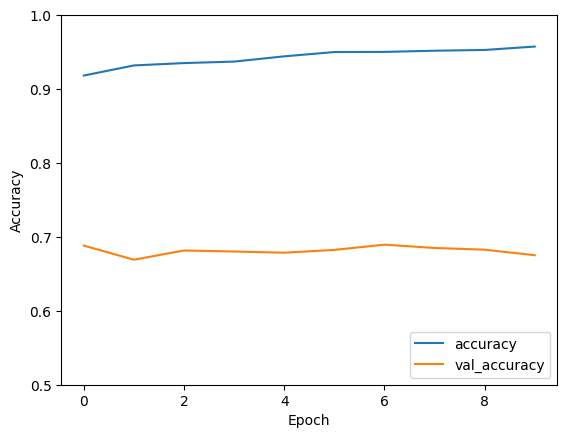

In [20]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [21]:
print('Test Accuracy for adam  is',test_acc)

Test Accuracy for adam  is 0.6751999855041504
